# Big Basket E-Commerce Data Anlaysis for Product Warehousing Insights and Hence Inventory Management.

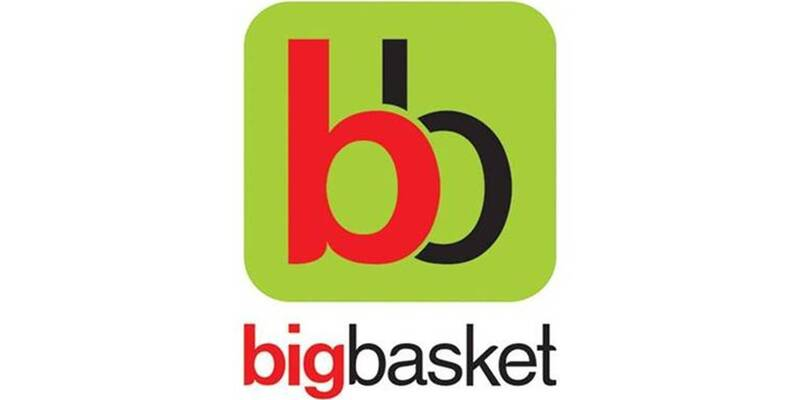

# **About Dataset**

E-commerce (electronic commerce) is the activity of electronically buying or selling of products on online services or over the Internet. E-commerce draws on technologies such as mobile commerce, electronic funds transfer, supply chain management, Internet marketing, online transaction processing, electronic data interchange (EDI), inventory management systems, and automated data collection systems. E-commerce is in turn driven by the technological advances of the semiconductor industry, and is the largest sector of the electronics industry.

Bigbasket is the largest online grocery supermarket in India. Was launched somewhere around in 2011 since then they've been expanding their business. Though some new competitors have been able to set their foot in the nation such as Blinkit etc. but BigBasket has still not loose anything - thanks to ever expanding popular base and their shift to online buying.

# Ask Phase

Questions to be answered

1.   No of Products in each Category?
2.   Average sales price category wise?
3.   Spread of sales price across top category products?
4.   Sub Categories count in each category?
5.   Rating profile across categories?
6.   % Discount for each product and visualize category wise Average % Discount offered.
7.   In house(Big Basket) products revenue share and category details?
7.   Category vs type count?
8.   Top selling products, brands, category?
9.   Distribution of revenue across categories % wise?
10.  Identify the vital few (Pareto analysis) categories responsible for the revenue?
11. Find the relationships among numerical variables in the dataset.(correlation analysis).
12. What are the Top brands with the most types of products?









```
# This is formatted as code
```

# Prepare phase

In this phase, we shall collect and understand the data required for analysis.


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
!pip install nltk
import nltk
from nltk.tokenize import RegexpTokenizer

In [ ]:
df = pd.read_csv("/content/sample_data/BigBasket Products.csv")
df.head(5)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [ ]:
df.dtypes

index             int64
product          object
category         object
sub_category     object
brand            object
sale_price      float64
market_price    float64
type             object
rating          float64
description      object
dtype: object

In [ ]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


# Process phase



This is the phase where we clean the data by removing duplicates, filling in missing values, NA and also restructing the data frame as required in the further phase of analyze.



In [ ]:
df.duplicated().sum()

0

<Axes: >

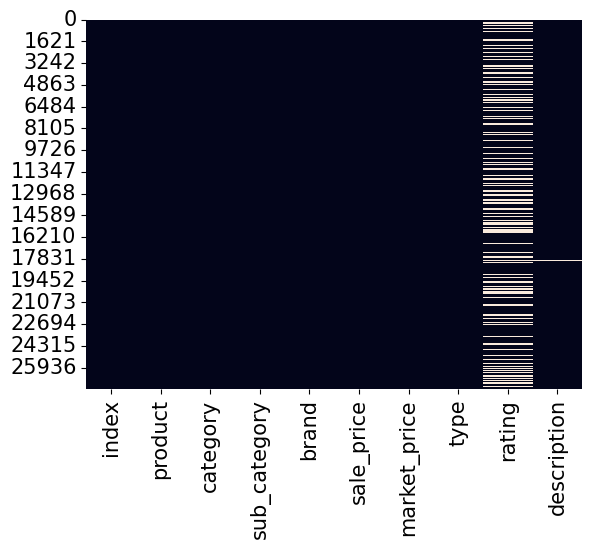

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.isna().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [ ]:
df.ffill(inplace= True);

In [ ]:
# Conversion of categorical variable (description) to numerical variable(count of words) for further analysis.
m=[]
for i in df['description']:
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(i)
  m.append(len(tokens))
m
df['description_length']=m
df.head(5)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,description_length
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,31
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",54
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",77
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,222
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,75


In [ ]:
df.drop(columns='description', inplace=True)

In [ ]:
df.rename(columns = {'index':'SNo'}, inplace = True)
df.set_index("SNo", inplace=True)

# Analyze Phase

The fourth phase is to analyze the data. The primary goal in this phase is to find the relationships, trends, and patterns that will help you solve your business problem more accurately. In this phase we perform calculations, combine data from multiple sources

In [ ]:
df.describe()

,sale_price,market_price,rating,description_length
count,27555.000000,27555.000000,27555.000000,27555.000000
mean,322.514808,382.056664,3.944809,81.293232
std,486.263116,581.730717,0.736818,62.560387
min,2.450000,3.000000,1.000000,1.000000
25%,95.000000,100.000000,3.700000,43.000000
50%,190.000000,220.000000,4.100000,64.000000
75%,359.000000,425.000000,4.300000,98.000000
max,12500.000000,12500.000000,5.000000,727.000000


In [ ]:
# Addition of a Discount Column in the existing Data frame
df["%Discount"]=(df['market_price']-df['sale_price'])*100/df['market_price']
df.sort_values(by=['%Discount'], ascending=False).head(10)

,product,category,sub_category,brand,sale_price,market_price,type,rating,description_length,%Discount
SNo,,,,,,,,,,
26977,Curry Leaves,Fruits & Vegetables,Herbs & Seasonings,Fresho,2.45,15.0,Indian & Exotic Herbs,3.5,39,83.666667
17714,Fruit & Vegetables Hand Juicer,"Kitchen, Garden & Pets",Kitchen Accessories,Triones,349.00,1995.0,Kitchen Tools & Other Accessories,1.9,156,82.506266
13319,Small Silicone Spatula With Plastic Handle - A...,"Kitchen, Garden & Pets",Bakeware,HAZEL,75.00,399.0,Baking Tools & Brushes,3.9,128,81.203008
13741,Decorative Party Light Big Star String LED Lig...,"Kitchen, Garden & Pets",Appliances & Electricals,Lexton,209.00,1099.0,CFL & Led Bulbs,3.2,45,80.982712
10439,NHS 860 Temperature Control Professional Hair ...,Beauty & Hygiene,Hair Care,Nova,467.03,2395.0,Tools & Accessories,3.2,154,80.499791
4563,Concealer Brush 930,Beauty & Hygiene,Makeup,Mud,350.00,1750.0,Makeup Accessories,4.0,16,80.000000
11474,Decorative Party Light Golden Bell String LED ...,"Kitchen, Garden & Pets",Appliances & Electricals,Lexton,415.00,1999.0,CFL & Led Bulbs,3.6,34,79.239620
13266,Decorative Party Light Golden Bell String LED ...,"Kitchen, Garden & Pets",Appliances & Electricals,Lexton,415.00,1999.0,CFL & Led Bulbs,4.4,34,79.239620
10093,USB String Fairy Lights 3M 30 LED For Decorati...,"Kitchen, Garden & Pets",Appliances & Electricals,Mansaa,85.00,399.0,CFL & Led Bulbs,3.9,265,78.696742


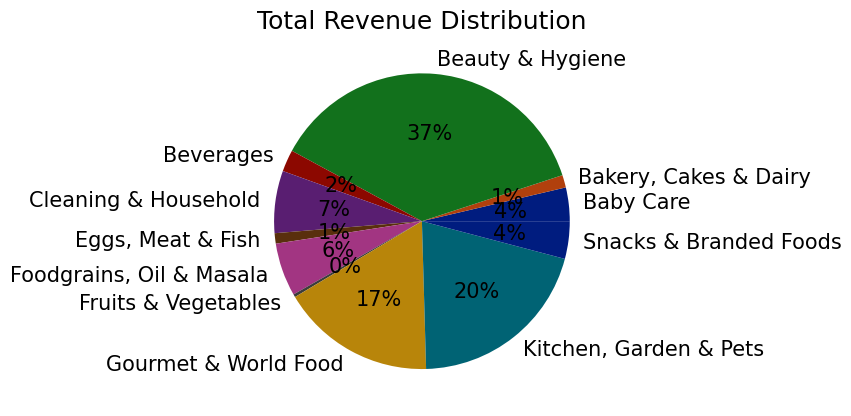

In [ ]:
Sales_data= df.groupby('category')['sale_price'].sum()
# plotting data on chart
plt.title("Total Revenue Distribution")
palette_color = sns.color_palette('dark')
plt.pie(Sales_data, labels=Sales_data.index, colors=palette_color, autopct='%.0f%%')

palette_color = sns.color_palette('dark')

<ipython-input-178-b6869bc6a1bf>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(P['Category'], rotation=90)


Text(0.5, 1.0, 'Pareto Chart')

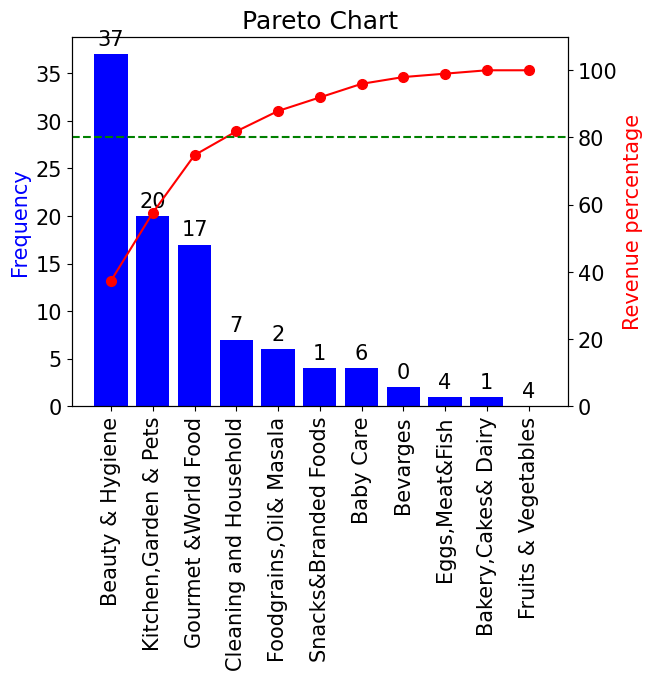

In [ ]:
data = {'Category': ['Beauty & Hygiene', 'Kitchen,Garden & Pets', 'Gourmet &World Food', 'Cleaning and Household','Bevarges','Eggs,Meat&Fish','Foodgrains,Oil& Masala','Fruits & Vegetables','Snacks&Branded Foods','Bakery,Cakes& Dairy','Baby Care'],
        'Frequency': [37, 20, 17, 7,2,1,6,0,4,1,4]}
# Create DataFrame
P = pd.DataFrame(data)

# Sort the DataFrame by 'Frequency' in descending order
P = P.sort_values(by='Frequency', ascending=False)

# Calculate cumulative percentage
P['Cumulative Percentage'] = (P['Frequency'].cumsum() / P['Frequency'].sum()) * 100

# Create Pareto chart
fig, ax1 = plt.subplots()

# Plot the bar chart
bars = ax1.bar(P['Category'], P['Frequency'], color='b')
ax1.set_ylabel('Frequency', color='b')

# Create secondary y-axis for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(P['Category'], P['Cumulative Percentage'], color='r', marker='o', ms=7)
ax2.axhline(y=80, color='g', linestyle='--')  # Add 80% line
ax2.set_ylabel('Revenue percentage', color='r')
ax2.set_ylim([0, 110])  # Set the limit from 0 to 110 for percentage scale

# Add labels on top of each bar
for i, bar in enumerate(bars):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, P['Frequency'][i], ha='center', va='bottom')

# Rotate x-axis labels vertically
ax1.set_xticklabels(P['Category'], rotation=90)

# Show the plot
plt.title('Pareto Chart')

In [ ]:
# Identify the brands that belong to big basket
#Assumption is brands starting with bb are inhouse brands
l=[]
for i in df['brand']:
    if i[0:2]=='bb' and i not in l:
        l.append(i)
o=['Fresho','HappyChef','Tasties','GoodDiet'] # These are also the brands of big basket (source: online)
for i in o:
   l.append(i)
l
Bb= df.loc[df['brand'].isin(['Fresho','HappyChef','Tasties','GoodDiet'])];
Revenue_percentage= Bb['sale_price'].sum()*100/df['sale_price'].sum()
Revenue_percentage
#Bb['category'].value_counts()
# Conclusion is big basket in house brands have very minimal presence in the two most revenue generating Categories, owing to low share in overall revenue percentage


1.1063959249670623

# Share


The fifth phase is to share your data findings. The data now transformed has to be made into a visual (chart, graph). The reason for making data visualizations is that there might be people, mostly stakeholders that are non-technical. Visualizations are made for a simple understanding of complex data.

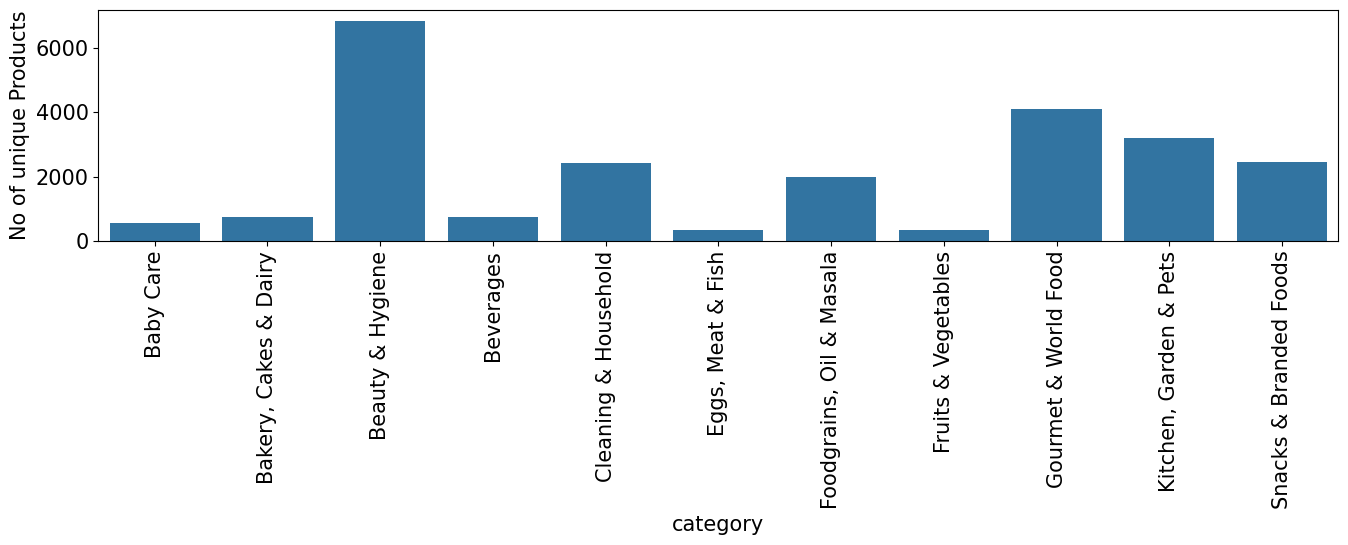

In [ ]:
#Category wise Unique products numbers
Categorywise_Productcount= df.groupby("category")["product"].nunique()
dp=Categorywise_Productcount.to_frame()
dp.rename(columns = {'product':'No of unique Products'}, inplace = True)
#Category wise poduct count barplot
plt.figure(figsize=(16,3))
fig= sns.barplot(data=dp, x='category',y='No of unique Products')
plt.xticks(rotation=90);
#The category of Beauty & Hygiene is the most sorted out category with more than 6000 products thus catering a wide spectrum of people.

In [ ]:
# Category wise average sales price
Categorywise_Sale_price= df.groupby("category")["sale_price"].mean()
df1=Categorywise_Sale_price.to_frame()
df1.sort_values(by=['sale_price'],ascending=False).head(4)

,sale_price
category,
Baby Care,534.946180
"Kitchen, Garden & Pets",507.524615
Beauty & Hygiene,418.679197
Gourmet & World Food,319.854011


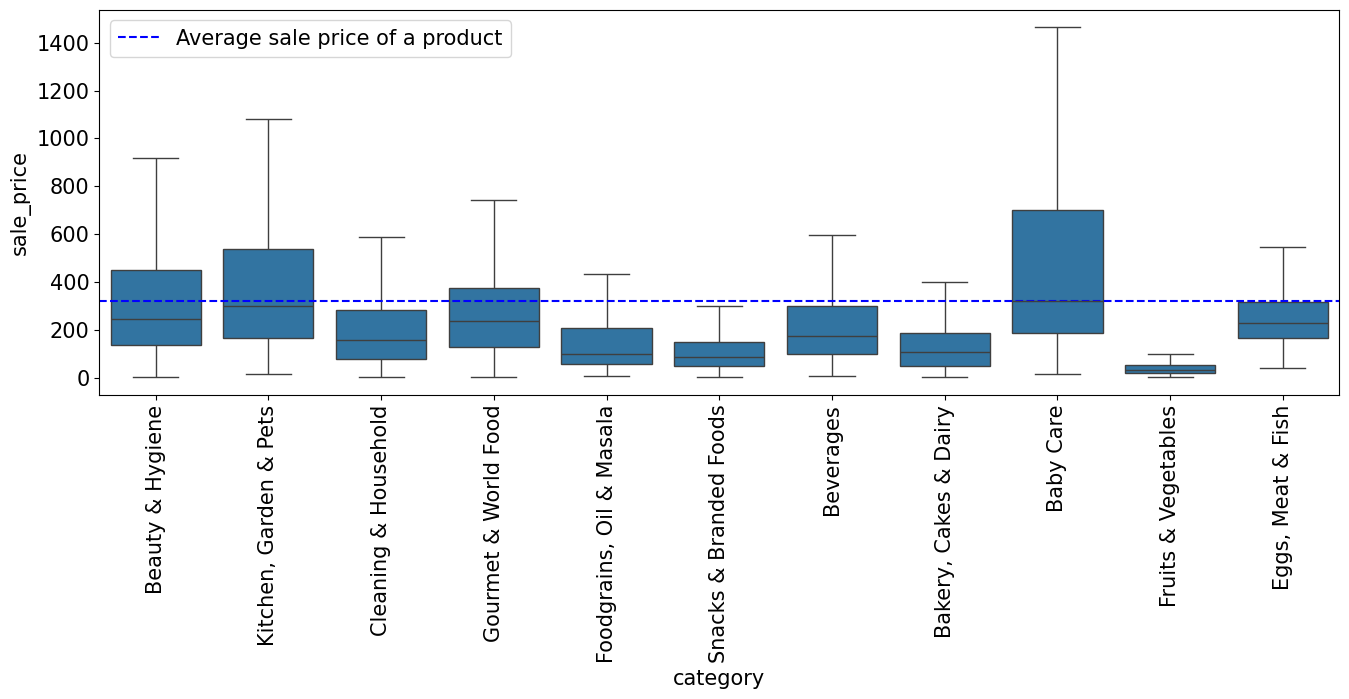

In [ ]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df, x="category", y="sale_price",showfliers= False)
plt.xticks(rotation=90);
plt.axhline(y=df['sale_price'].mean(), color='b', linestyle='--', label='Average sale price of a product')
plt.legend()

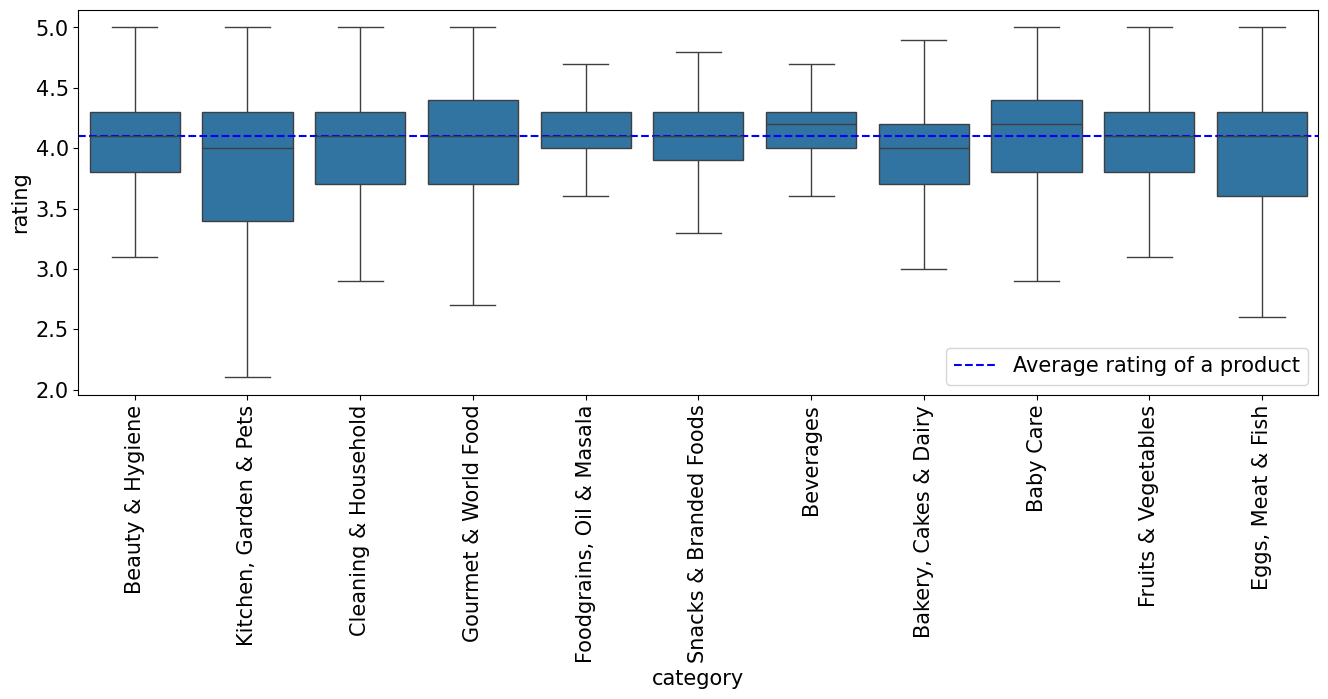

In [ ]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df, x="category", y="rating",showfliers= False)
plt.xticks(rotation=90);
plt.axhline(y=df['rating'].median(), color='b', linestyle='--', label='Average rating of a product')
plt.legend()

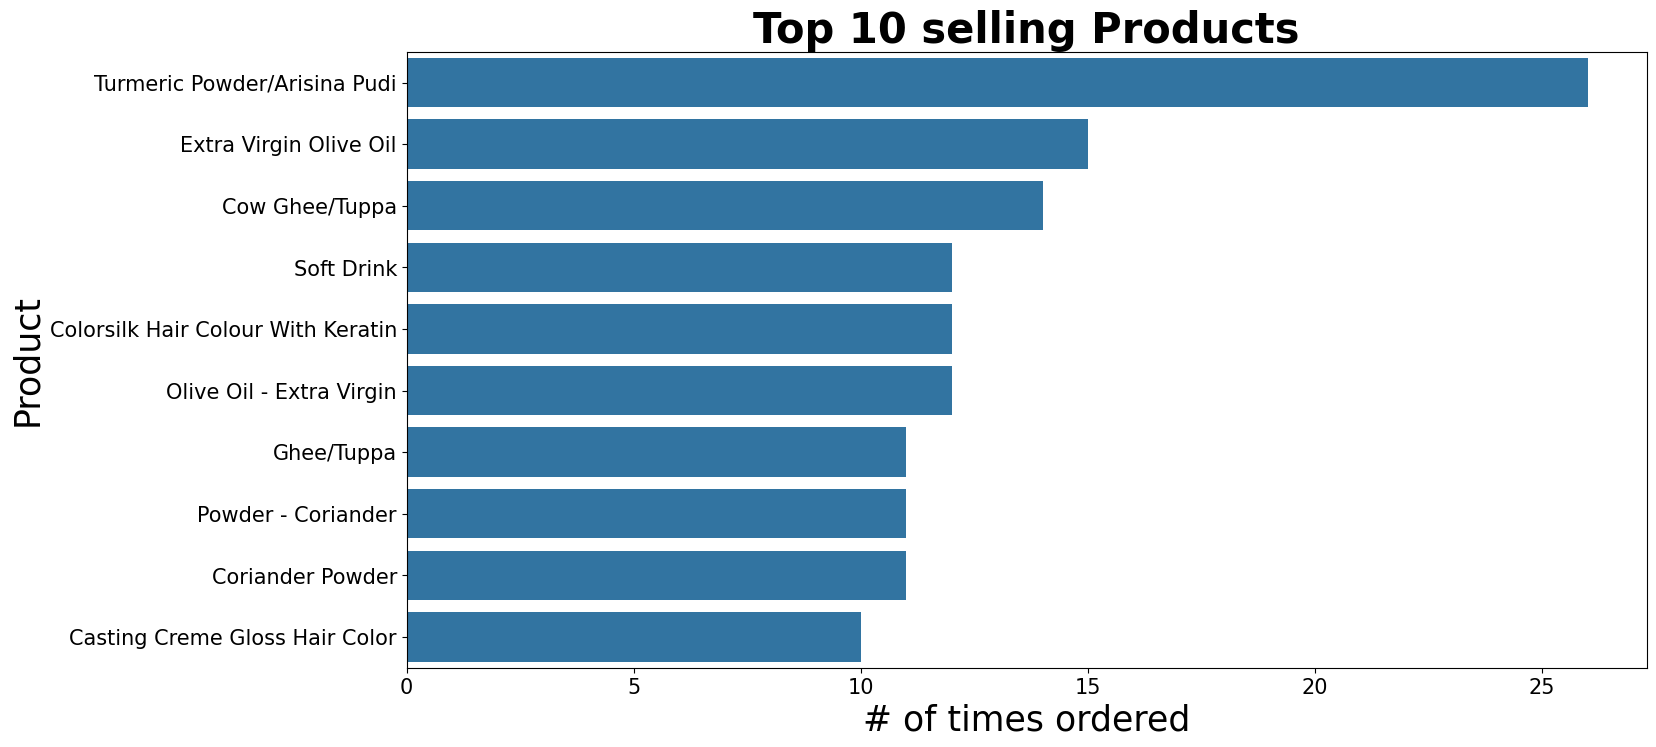

In [ ]:
data = df['product'].value_counts()[:10]
plt.figure(figsize=(16,8))
sns.barplot(x=data,y=data.index)
plt.xlabel('# of times ordered',fontdict={'fontsize': 25})
plt.ylabel('Product',fontdict={'fontsize': 25})
plt.title('Top 10 selling Products',fontweight="bold",fontdict={'fontsize': 30})
plt.rcParams['font.size'] = 15

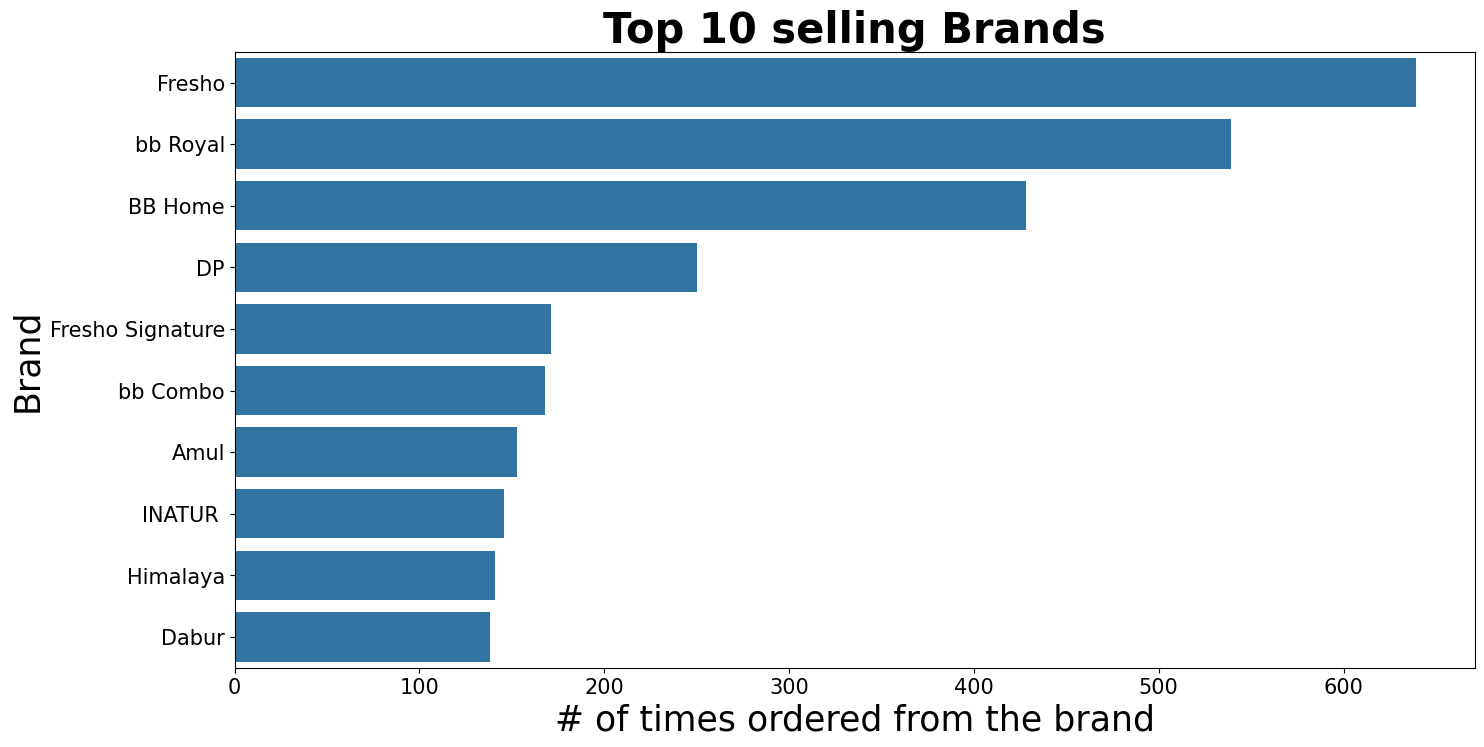

In [ ]:
data = df['brand'].value_counts()[:10]
plt.figure(figsize=(16,8))
sns.barplot(x=data,y=data.index)
plt.xlabel('# of times ordered from the brand',fontdict={'fontsize': 25})
plt.ylabel('Brand',fontdict={'fontsize': 25})
plt.title('Top 10 selling Brands',fontweight="bold",fontdict={'fontsize': 30})
plt.rcParams['font.size'] = 15

<Axes: title={'center': 'Top 10 most discounted brands'}, xlabel='brand', ylabel='%Discount'>

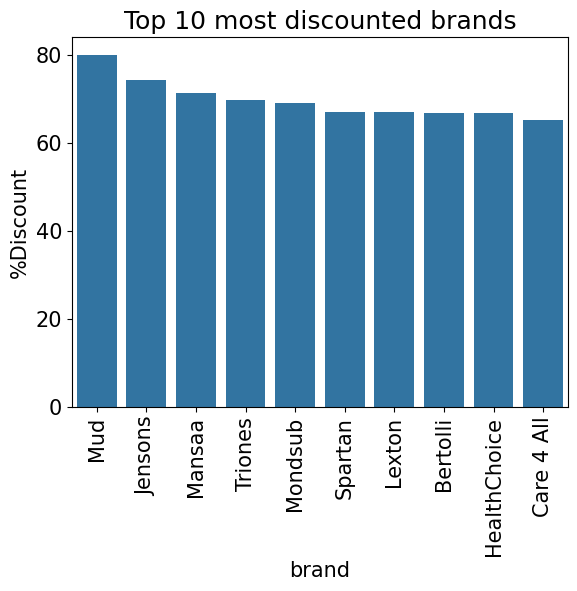

In [ ]:
Brand_D=df.groupby('brand')['%Discount'].mean().to_frame()
BD= Brand_D.sort_values('%Discount', ascending=False).head(10)
plt.xticks(rotation=90)
plt.title("Top 10 most discounted brands")
sns.barplot(data=BD, x='brand',y='%Discount')
#The brand that provides the most discount is Mud

<Axes: title={'center': 'Average discount across categories'}, xlabel='category', ylabel='%Discount'>

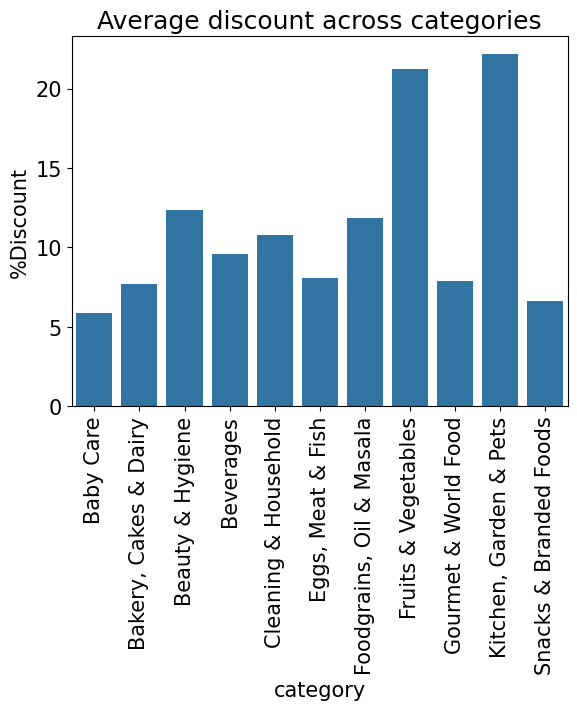

In [ ]:
dt=df.groupby('category')['%Discount'].mean().to_frame()
plt.xticks(rotation=90)
plt.title("Average discount across categories")
sns.barplot(data=dt,x='category',y='%Discount')

# Conclusion: Most and highest discounted products belong to Kitchen, Garden & Pets Category, Reason for the same may be due to low sales of the category products or else the products are marke dup by a large %.

<Axes: title={'center': 'sale price of B&H Products'}, xlabel='product', ylabel='sale_price'>

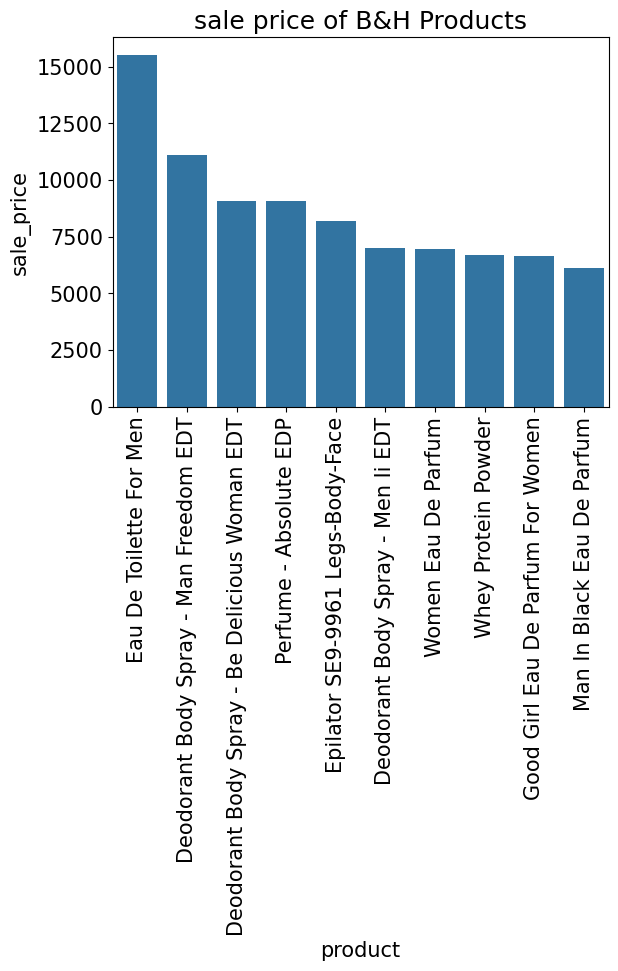

In [ ]:
# select the data points of just Beauty & Hygiene as it contribute the highest to the revenue
s = df[df['category']=='Beauty & Hygiene']
s_dash= s.groupby('product')['sale_price'].sum().to_frame()
p1=s_dash.sort_values('sale_price', ascending = False).head(10)
plt.xticks(rotation=90)
plt.title("sale price of B&H Products")
sns.barplot(data=p1, x='product', y='sale_price')


<Axes: xlabel='sale_price', ylabel='Count'>

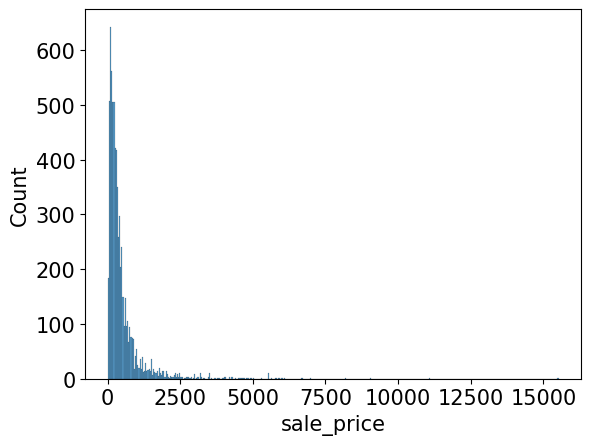

In [ ]:
sns.histplot(data=s_dash,x='sale_price')
#Sale price of B& H category products are positively skewed

<Axes: ylabel='sale_price'>

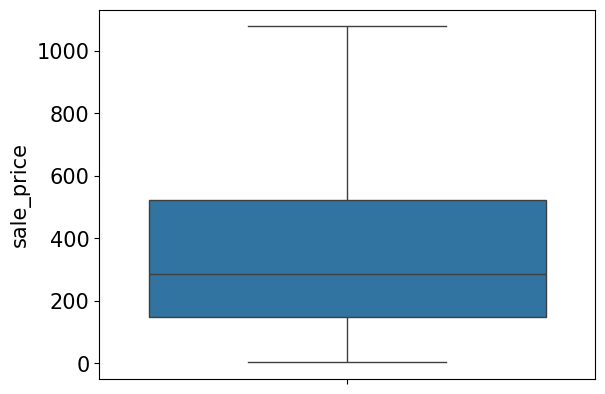

In [ ]:
sns.boxplot(data=s_dash,y='sale_price',showfliers=False)

In [ ]:
s.sort_values('%Discount', ascending =False)
A= s[s['%Discount']>50]
A.groupby('type').count()
# Conclusion-1 : Men's Deodarants,Face Masks & Safety Gears, Moustache & Beard Care are the top three types of products in Beauty Hygiene category that offered over 50% discount.

,product,category,sub_category,brand,sale_price,market_price,rating,description_length,%Discount
type,,,,,,,,,
Bath & Shower,1,1,1,1,1,1,1,1,1
Body Care,1,1,1,1,1,1,1,1,1
Eau De Toilette,4,4,4,4,4,4,4,4,4
Eyes,1,1,1,1,1,1,1,1,1
Face & Body,2,2,2,2,2,2,2,2,2
Face Care,2,2,2,2,2,2,2,2,2
Face Masks & Safety Gears,12,12,12,12,12,12,12,12,12
Hair Oil & Serum,2,2,2,2,2,2,2,2,2
Makeup Accessories,1,1,1,1,1,1,1,1,1


In [ ]:
T=df.groupby('brand')['type'].nunique().to_frame()
T.sort_values(by='type', ascending=False).head(10)

,type
brand,
bb Combo,53
Fresho,42
BB Home,37
Dabur,34
bb Royal,32
DP,31
Nutty Yogi,23
NUTRIWISH,23
Patanjali,21


<ipython-input-192-1f8db7c938a8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<Axes: >

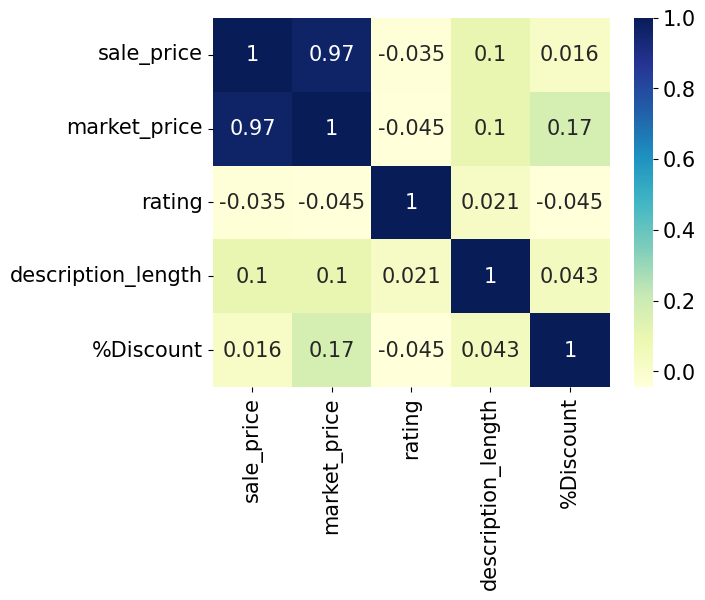

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# ACT

Insights from the above analysis

Key Takeaways from the above performed EDA


*   Beauty & Hygiene (37%), Kitchen Garden & pets (20%) and Gourment & World Food Categories(17%) Constitute to around 75% of the total Big Basket E commerce Revenue.
*   Big Basket  in house brands have not stepped into the most revenue generating Beauty & Hygiene, Kitchen Garden & pets Categories. Thus, BB products just generate around 1.1% of total revenue.
*   Beauty & Hygiene is the most sorted out Category with more than 6000 products.


*   Baby Care Category products are the costliest among others
*   Bevarages and Baby Care the most highly rated categories.
*   Turmeric Powder/ Arisina Pudi is the most sold out product.
*   Top 3 most prefered brands (most frequently ordered) in the big basket ecommere portal are the in house brands of Big Basket namely Fresho, bb Royal & BB Home, Hence clearly stating that the inhouse brands have a great consumer base. And also it suggests that venturing into Beauty & Hygiene, Kitchen Garden & pets Categories would most likely a good move.
* Most discounted brand is Mud (80%).
* Kitchen Garden & pets, Fruits & Vegetable Categories are the most discounted categories with average discount of >20%.
* Beauty & Hygiene Category Products Sales price distribution is postively skewed with Quartile 3(Q3) (price below which 75% of products lie) at Rs 550. Highest sale price being 1500.
*   Men's Deodarants,Face Masks & Safety Gears, Moustache & Beard Care are the top three types of products in Beauty Hygiene category that offered over 50% discount.

